In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Análise Exploratória

### Carregar e visualizar as primeiras linhas dos dados

In [2]:
laptop_price = pd.read_pickle("../../datasets/processed/laptop_price.pkl")
laptop_price.head()

,company,typename,inches,screen_resolution,x_screen,y_screen,cpu_manufacturer,cpu_ghz,gpu_manufacturer,ram_gb,memory_0_gb,memory_0_type,memory_1_gb,memory_1_type,opsys,weight_kg,price_euros
0,Apple,Ultrabook,14-,2560x1600,2560,1600,Intel,2.3,Intel,8,128,ssd,0,empty,macOS,1.37,1339.69
1,Apple,Ultrabook,14-,1440x900,1440,900,Intel,1.8,Intel,8,128,flash storage,0,empty,macOS,1.34,898.94
2,HP,Notebook,14~16,1920x1080,1920,1080,Intel,2.5,Intel,8,256,ssd,0,empty,Outros,1.86,575.00
3,Apple,Ultrabook,14~16,2880x1800,2880,1800,Intel,2.7,AMD,16,512,ssd,0,empty,macOS,1.83,2537.45
4,Apple,Ultrabook,14-,2560x1600,2560,1600,Intel,3.1,Intel,8,256,ssd,0,empty,macOS,1.37,1803.60


In [3]:
laptop_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   company            1302 non-null   category
 1   typename           1302 non-null   category
 2   inches             1302 non-null   category
 3   screen_resolution  1302 non-null   category
 4   x_screen           1302 non-null   int16   
 5   y_screen           1302 non-null   int16   
 6   cpu_manufacturer   1302 non-null   category
 7   cpu_ghz            1302 non-null   float32 
 8   gpu_manufacturer   1302 non-null   category
 9   ram_gb             1302 non-null   uint8   
 10  memory_0_gb        1302 non-null   int16   
 11  memory_0_type      1302 non-null   category
 12  memory_1_gb        1302 non-null   int16   
 13  memory_1_type      1302 non-null   category
 14  opsys              1302 non-null   category
 15  weight_kg          1302 non-null   float32 
 16  price_

### Verificar quantidade de valores únicos

In [4]:
print("Quantidade de Valores únicos por coluna")
for column in laptop_price.columns:
    print(f"{column}: {len(laptop_price[column].unique())}")

Quantidade de Valores únicos por coluna
company: 19
typename: 6
inches: 3
screen_resolution: 15
x_screen: 13
y_screen: 10
cpu_manufacturer: 2
cpu_ghz: 25
gpu_manufacturer: 3
ram_gb: 9
memory_0_gb: 13
memory_0_type: 4
memory_1_gb: 6
memory_1_type: 4
opsys: 4
weight_kg: 171
price_euros: 791


### Função para criar gráfico de barra de média de preço

In [5]:
def create_bar(x, x_label, rotation=0):
    df_groupred = laptop_price.groupby(by=x, as_index=False)['price_euros'].mean()

    fig = plt.figure(figsize=(16, 6))
    sns.barplot(x=x, y='price_euros', data=df_groupred)
    plt.xlabel(x_label, fontsize='large', family='monospace')
    plt.ylabel("Preço (€)", fontsize='large',family='monospace')
    plt.xticks(rotation=rotation, size=12)
    plt.yticks(size=12)

    plt.title(f"Média de Preço dos Notebooks por {x_label.capitalize()}", fontsize='large', fontweight='bold', 
            style='italic', family='monospace')
    plt.show() 

### Verificar média de preço por marca

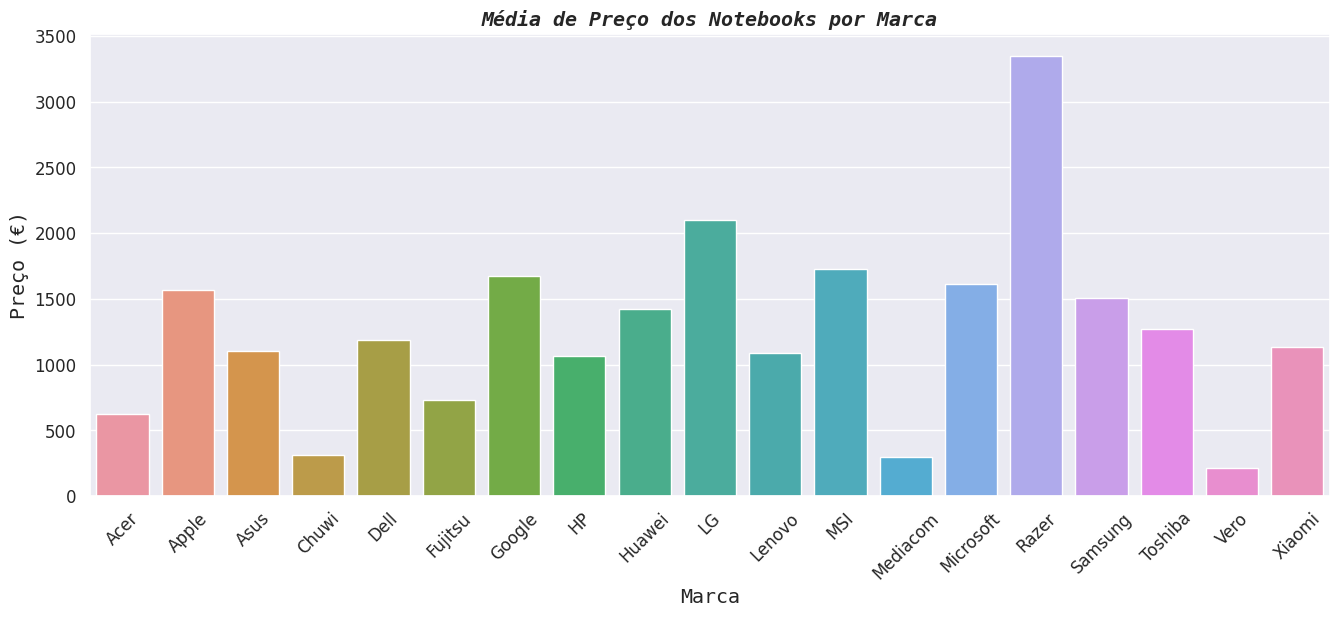

In [6]:
create_bar('company', 'Marca', 45)

### Verificar média de preço por tipo

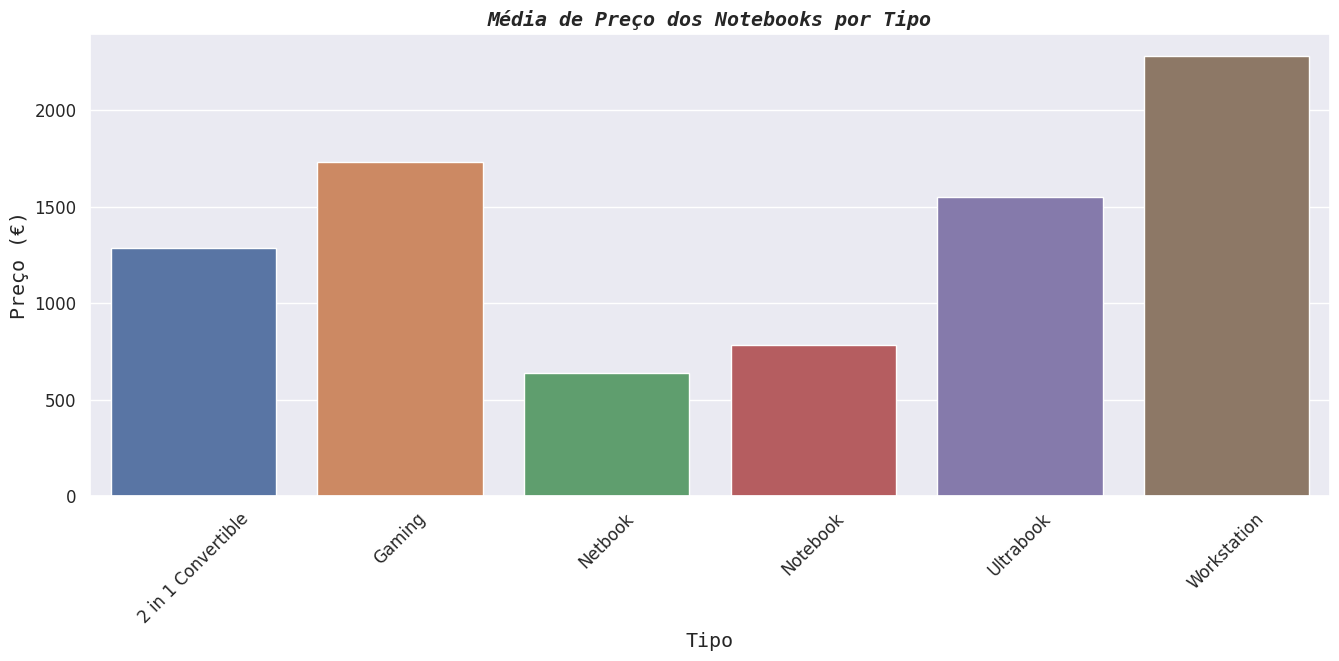

In [7]:
create_bar('typename', 'Tipo', 45)

### Verificar média de preço por cpu

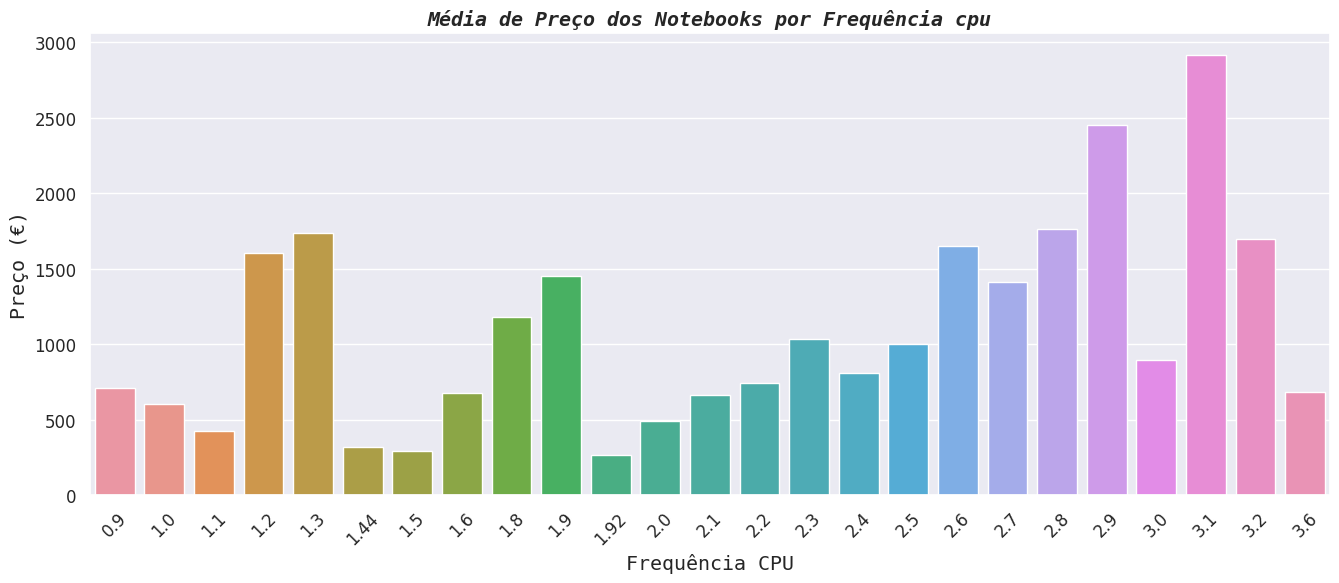

In [8]:
create_bar('cpu_ghz', 'Frequência CPU', 45)

### Verificar média de preço por quantidade de ram

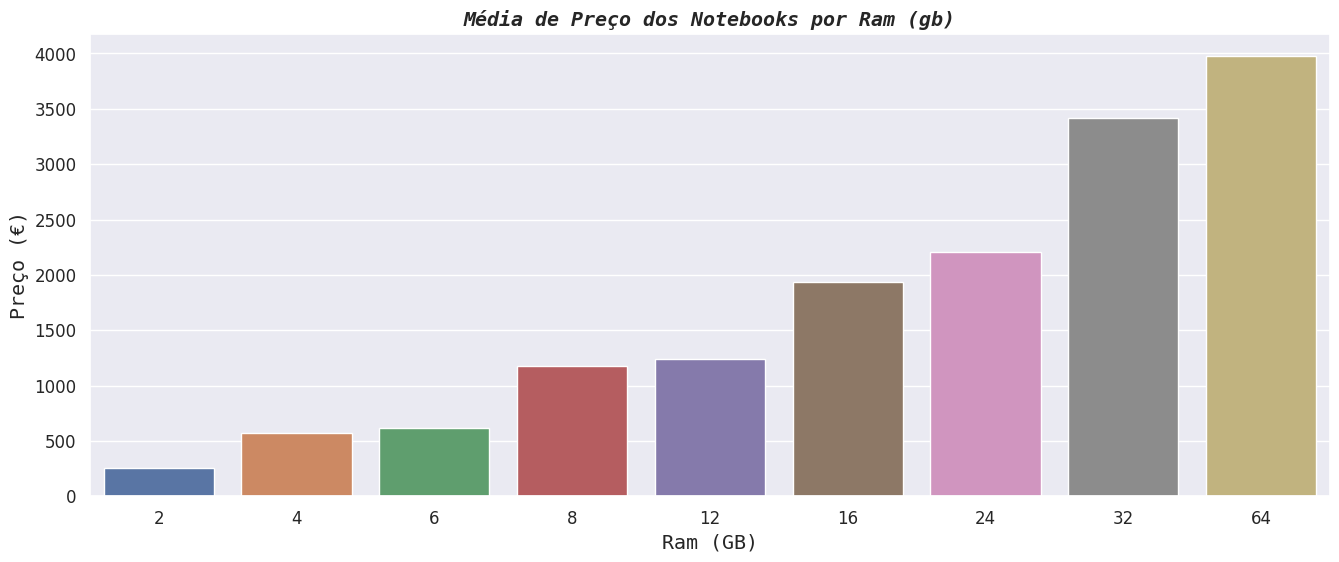

In [9]:
create_bar('ram_gb', 'Ram (GB)', 0)

### Verificar média de preço por sistema operacional

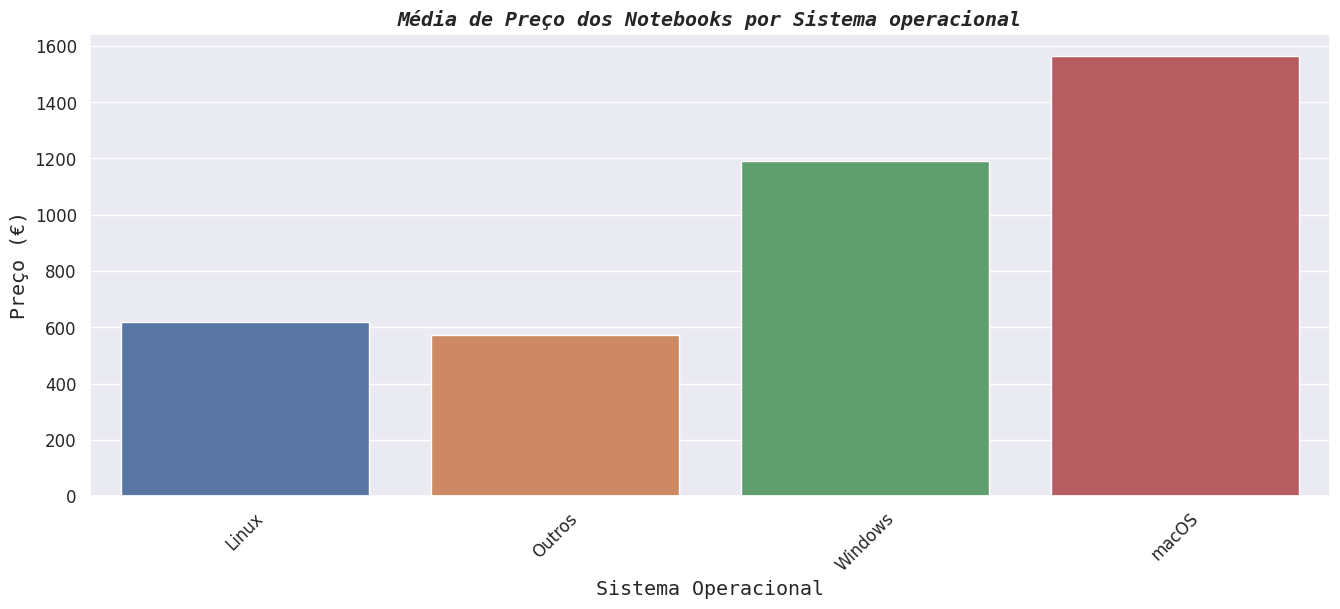

In [10]:
create_bar('opsys', 'Sistema Operacional', 45)

### Verificar média de preço por tipo de armazenamento 0 e 1

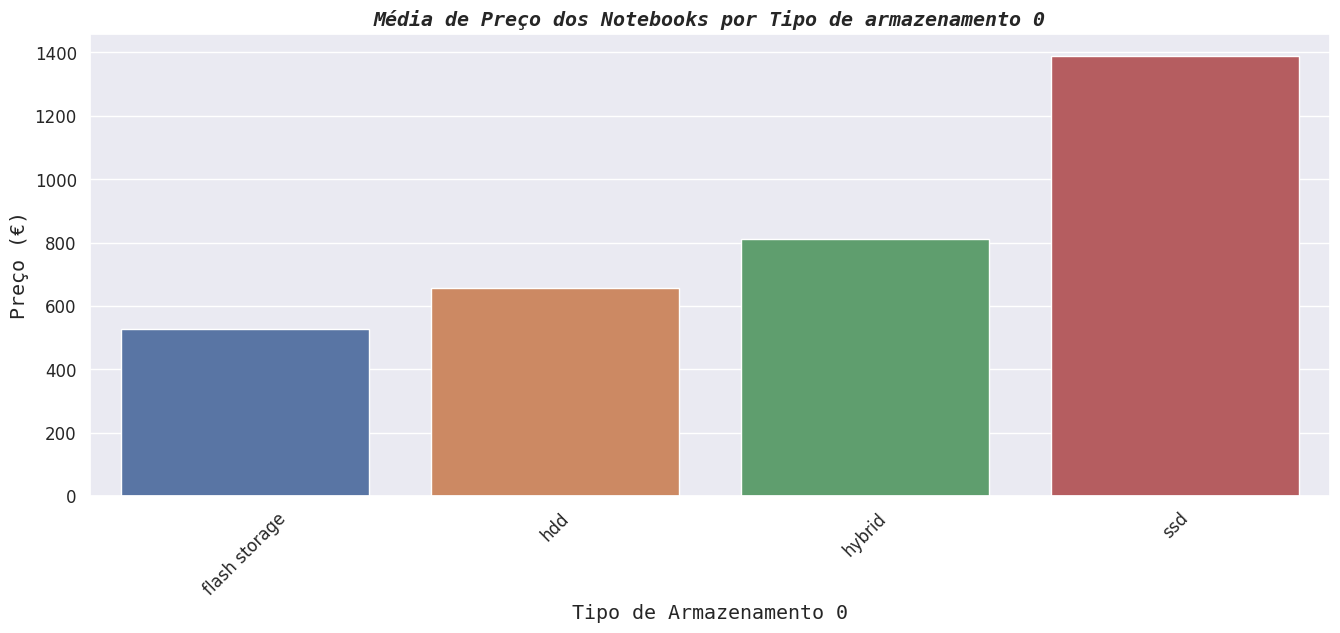

In [11]:
create_bar('memory_0_type', 'Tipo de Armazenamento 0', 45)

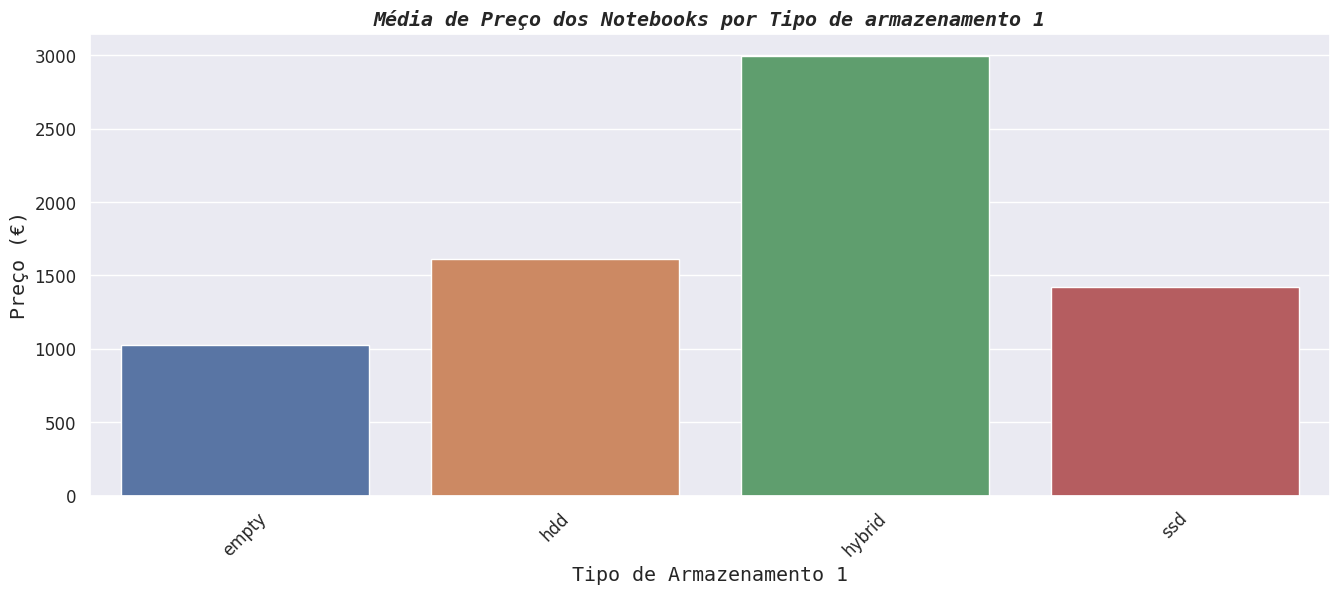

In [12]:
create_bar('memory_1_type', 'Tipo de Armazenamento 1', 45)

### Verificar média de preço por polegadas

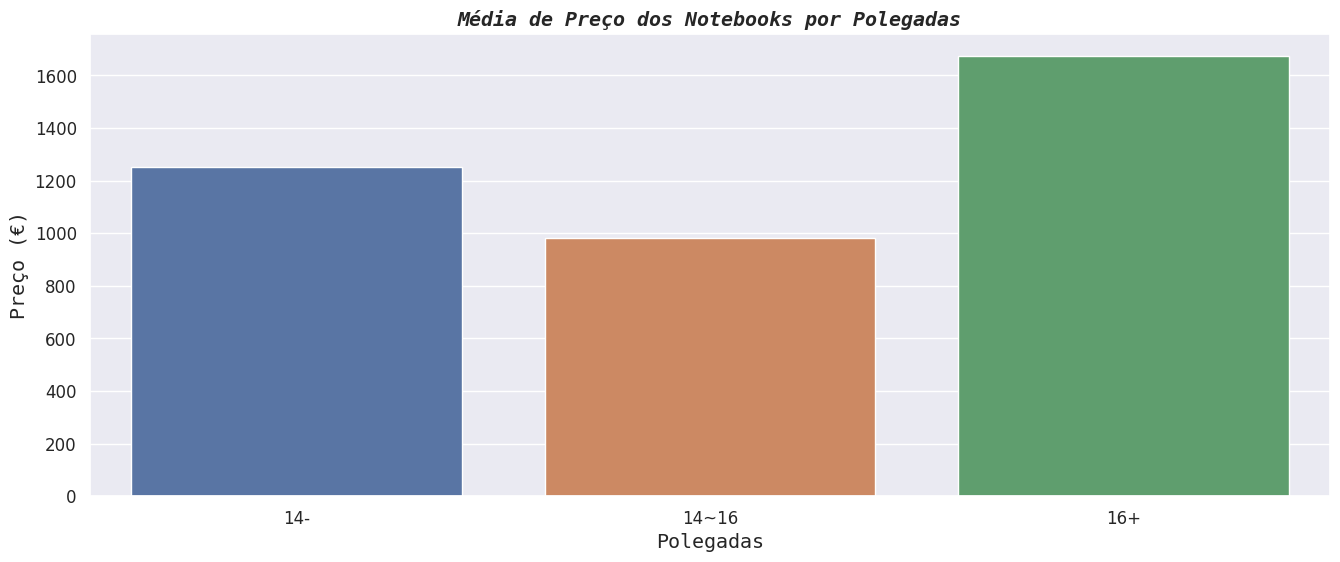

In [13]:
create_bar('inches', 'Polegadas', 0)

### Verificar média de preço por fabricante da CPU

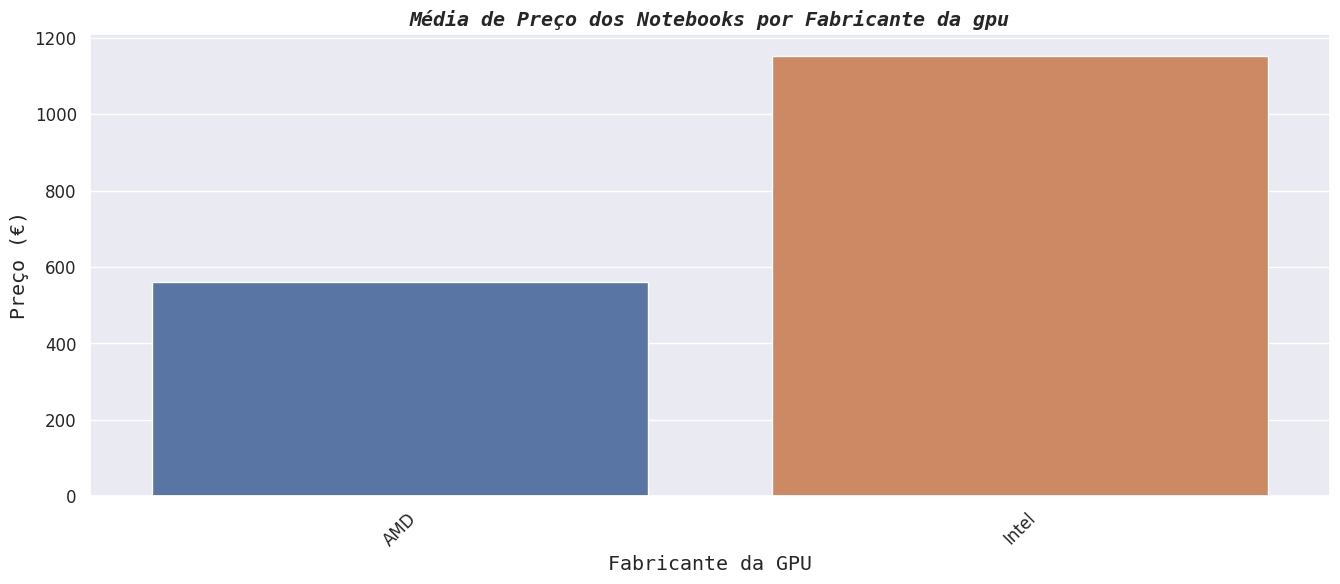

In [14]:
create_bar('cpu_manufacturer', 'Fabricante da GPU', 45)

### Verificar média de preço por fabricante da GPU

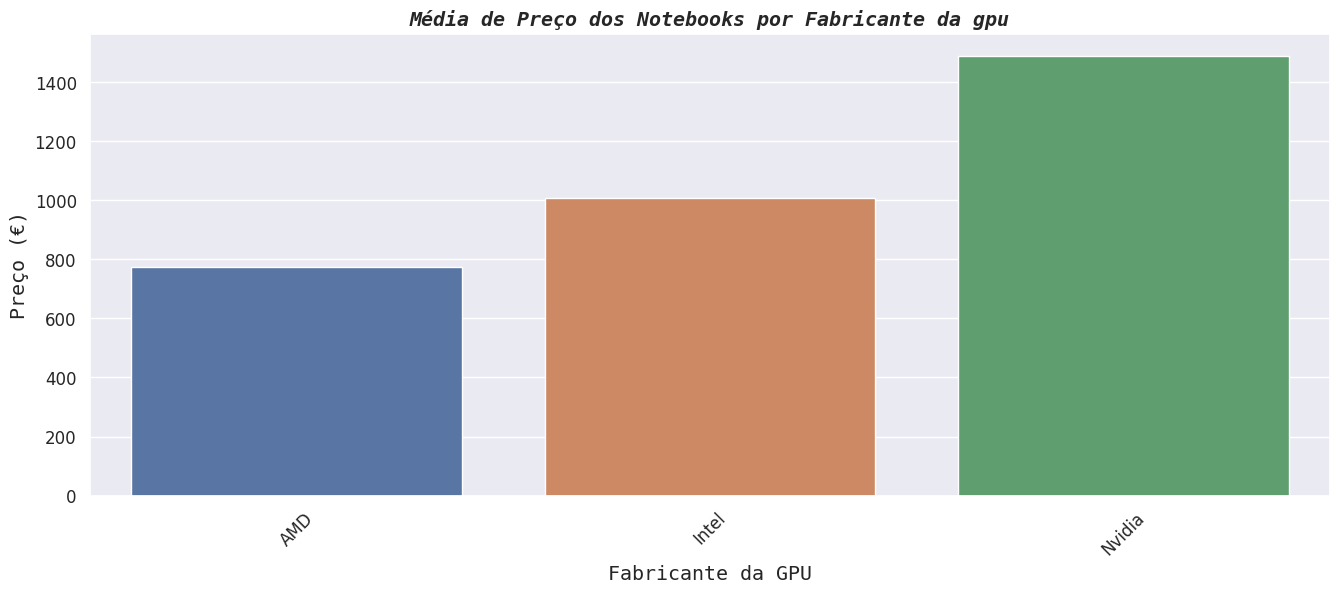

In [15]:
create_bar('gpu_manufacturer', 'Fabricante da GPU', 45)